<a href="https://colab.research.google.com/github/VshardNarthi/Location-intelligance/blob/main/GIS_analysis_Japan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the libraries

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
from google.colab import drive
import folium
from shapely.ops import cascaded_union

Read csv from Google drive

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/GIS-analysis/japan_20190101-20211009_query.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Check dataframe

In [ ]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-10-07T16:44:22.445Z,31.8288,137.9307,377.87,4.1,mb,NaN,134,2.044,0.37,...,2021-10-07T17:17:35.040Z,"279 km SE of Shing?, Japan",earthquake,10.5,8.4,0.059,80,reviewed,us,us
1,2021-10-07T13:41:24.549Z,35.5771,140.0698,62.00,5.9,mww,NaN,29,1.788,1.12,...,2021-10-08T09:14:22.461Z,"4 km WSW of Chiba, Japan",earthquake,6.0,1.9,0.055,32,reviewed,us,us
2,2021-10-06T08:12:55.045Z,31.2593,131.4710,35.00,5.4,mww,NaN,38,0.905,1.36,...,2021-10-07T17:03:18.664Z,"33 km SE of Kushima, Japan",earthquake,4.1,1.9,0.061,26,reviewed,us,us
3,2021-10-06T02:55:31.243Z,43.1908,146.7208,66.07,4.5,mb,NaN,169,2.881,0.65,...,2021-10-06T03:29:11.040Z,"67 km S of Shikotan, Russia",earthquake,10.4,7.4,0.115,22,reviewed,us,us
4,2021-10-05T17:46:02.054Z,40.0760,142.2531,44.77,5.7,mww,NaN,15,1.153,0.86,...,2021-10-07T07:15:28.829Z,"54 km NNE of Miyako, Japan",earthquake,6.6,4.1,0.046,45,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,2019-01-04T22:05:07.080Z,32.8198,140.1248,98.35,4.3,mb,NaN,147,0.394,0.46,...,2019-03-08T17:50:21.040Z,"233 km SSE of Shimoda, Japan",earthquake,12.0,4.7,0.080,44,reviewed,us,us
1846,2019-01-03T20:42:45.260Z,30.3888,138.0987,451.33,4.0,mb,NaN,113,3.085,0.75,...,2019-03-08T17:50:21.040Z,"Izu Islands, Japan region",earthquake,11.0,5.8,0.073,50,reviewed,us,us
1847,2019-01-03T09:10:28.440Z,33.0514,130.4705,10.00,4.7,mb,NaN,97,0.348,0.60,...,2020-07-10T17:21:55.993Z,"2 km NE of ?muta, Japan",earthquake,4.9,1.8,0.075,54,reviewed,us,us
1848,2019-01-02T15:11:16.070Z,39.4417,143.6408,21.01,4.5,mb,NaN,110,2.390,0.85,...,2019-03-08T17:50:21.040Z,"145 km E of Yamada, Japan",earthquake,9.1,6.4,0.180,9,reviewed,us,us


Plot the points where earthquakes of magnitude less than 7

In [ ]:
m = folium.Map(location=[35,136], tiles='cartodbpositron', zoom_start=5)
# go through each quake in set, make circle, and add to map.
for i in range(len(df)):
    if df.iloc[i]['mag'] <= 6:
        folium.Circle(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
        radius=10,
        color='blue'
    ).add_child(folium.Popup("Magnitude: " + str(df.iloc[i]['mag']) + " Depth: " + str(df.iloc[i]['depth']))).add_to(m)

m.save('minor-earthquakes.html')
m

Plot the points where earthquakes of magnitude greater than 6

In [ ]:
m = folium.Map(location=[35,136], tiles='cartodbpositron', zoom_start=5)
# go through each quake in set, make circle, and add to map.
for i in range(len(df)):
    if df.iloc[i]['mag'] > 6:
      folium.Circle(
            location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
            radius=df.iloc[i]['mag'] * 10000,
            weight=1,  # thickness of the border
            color='red',  # this is the color of the border
            opacity=0.5,  # this is the alpha for the border
            fill_color='red',  # fill is inside the circle
            fill_opacity=0.1,  # we will make that less opaque so we can see layers
        ).add_child(folium.Popup("Magnitude: " + str(df.iloc[i]['mag']) + " Depth: " + str(df.iloc[i]['depth']))).add_to(m)

m.save('major-earthquakes.html')
m

Map showing the mostly affected areas from earthquakes

In [ ]:
m = folium.Map(location=[38.2,143], tiles='cartodbpositron', zoom_start=8)
# go through each quake in set, make circle, and add to map.
for i in range(len(df)):
    if df.iloc[i]['mag'] > 6:
      folium.Circle(
            location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
            radius=df.iloc[i]['mag'] * 10000,
            weight=1,  # thickness of the border
            color='red',  # this is the color of the border
            opacity=0.5,  # this is the alpha for the border
            fill_color='red',  # fill is inside the circle
            fill_opacity=0.1,  # we will make that less opaque so we can see layers
        ).add_child(folium.Popup("Magnitude: " + str(df.iloc[i]['mag']) + " Depth: " + str(df.iloc[i]['depth']))).add_to(m)
m

In [ ]:
import folium
import geopandas as gpd

# Create a Folium map centered around a specific location (e.g., Tokyo, Japan)
map_center = [35.682839, 139.759455]  # Replace with the desired center coordinates
m = folium.Map(location=map_center, zoom_start=6)

# Create a custom HTML title for the map
html_title = """
<h1 style="text-align:center; font-size:24px;">Depth and Magnitude</h1>
"""

# Add the HTML title to the map
folium.Marker(location=map_center, icon=folium.DivIcon(html=html_title)).add_to(m)

geometry = [Point(lon, lat) for lon, lat in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(
    list(zip(df['time'], df['mag'], df['magType'],df['depth'], df['place'], df['type'], df['magError'], df['locationSource'], df['magSource'])),
    geometry=geometry,
    columns=["time", "mag", "magType","depth", "place", "type", "magError", "locationSource", "magSource"],
    crs="EPSG:4326"
)

# Create feature groups for each depth category
shallow_data = gdf[(gdf['mag'] > 6) & (gdf['depth'] <= 70)]
shallow_layer = folium.FeatureGroup(name="Shallow (<= 70 km)")
for _, row in shallow_data.iterrows():
    coords = row['geometry'].coords[0]  # Access the coordinates
    folium.CircleMarker(
        location=[coords[1], coords[0]],  # Latitude and longitude
        radius=5,
        popup=f"Depth: {row['depth']} km\nMagnitude: {row['mag']}",
        color='red',
        fill=True,
        fill_color='red',
    ).add_to(shallow_layer)

intermediate_data = gdf[(gdf['mag'] > 6) & (gdf['depth'] > 70) & (gdf['depth'] <= 300)]
intermediate_layer = folium.FeatureGroup(name="Intermediate (71-300 km)")
for _, row in intermediate_data.iterrows():
    coords = row['geometry'].coords[0]  # Access the coordinates
    folium.CircleMarker(
        location=[coords[1], coords[0]],  # Latitude and longitude
        radius=5,
        popup=f"Depth: {row['depth']} km\nMagnitude: {row['mag']}",
        color='blue',
        fill=True,
        fill_color='blue',
    ).add_to(intermediate_layer)

deep_data = gdf[(gdf['mag'] > 6) & (gdf['depth'] > 300)]
deep_layer = folium.FeatureGroup(name="Deep (> 300 km)")
for _, row in deep_data.iterrows():
    coords = row['geometry'].coords[0]  # Access the coordinates
    folium.CircleMarker(
        location=[coords[1], coords[0]],  # Latitude and longitude
        radius=5,
        popup=f"Depth: {row['depth']} km\nMagnitude: {row['mag']}",
        color='green',
        fill=True,
        fill_color='green',
    ).add_to(deep_layer)

# Add feature groups to the map
shallow_layer.add_to(m)
intermediate_layer.add_to(m)
deep_layer.add_to(m)

# Add layer control to toggle between shallow, intermediate, and deep earthquakes
folium.LayerControl().add_to(m)

# Display the map
m
m.save('earthquake_map_depth_magnitude.html')

In [ ]:
file_path_regions = '/content/drive/My Drive/GIS-analysis/japan-with-regions_.geojson' #geojson data file load in japan states.47
japan_regions_df = gpd.read_file(file_path_regions)
japan_regions_df

,id,name,density,path,geometry
0,5355,三重県,0,/world/Japan/三重県,"MULTIPOLYGON (((136.51819 35.24997, 136.53030 ..."
1,5359,京都府,0,/world/Japan/京都府,"MULTIPOLYGON (((134.87053 35.65896, 134.87114 ..."
2,5372,佐賀県,0,/world/Japan/佐賀県,"MULTIPOLYGON (((130.27361 33.47655, 130.28325 ..."
3,5360,兵庫県,0,/world/Japan/兵庫県,"MULTIPOLYGON (((134.87053 35.65896, 134.86992 ..."
4,5331,北海道,0,/world/Japan/北海道,"MULTIPOLYGON (((141.42981 43.41342, 141.41289 ..."
5,5348,千葉県,0,/world/Japan/千葉県,"MULTIPOLYGON (((139.78915 36.10023, 139.80118 ..."
6,5358,和歌山県,0,/world/Japan/和歌山県,"MULTIPOLYGON (((135.62474 34.38091, 135.63516 ..."
7,5347,埼玉県,0,/world/Japan/埼玉県,"MULTIPOLYGON (((139.13032 36.27593, 139.15175 ..."
8,5371,大分県,0,/world/Japan/大分県,"MULTIPOLYGON (((131.17545 33.58328, 131.18770 ..."
9,5356,大阪府,0,/world/Japan/大阪府,"MULTIPOLYGON (((135.71425 34.77803, 135.71179 ..."


In [ ]:
japan_regions_df['geometry'] = gpd.GeoSeries.from_wkt(japan_regions_df['geometry'].astype('str')) #get data in geometry column as geoseries
japan_regions_gdf = gpd.GeoDataFrame(japan_regions_df, crs="EPSG:4326") # assign WGS CRS using code
japan_regions_gdf

,id,name,density,path,geometry
0,5355,三重県,0,/world/Japan/三重県,"MULTIPOLYGON (((136.51819 35.24997, 136.53030 ..."
1,5359,京都府,0,/world/Japan/京都府,"MULTIPOLYGON (((134.87053 35.65896, 134.87114 ..."
2,5372,佐賀県,0,/world/Japan/佐賀県,"MULTIPOLYGON (((130.27361 33.47655, 130.28325 ..."
3,5360,兵庫県,0,/world/Japan/兵庫県,"MULTIPOLYGON (((134.87053 35.65896, 134.86992 ..."
4,5331,北海道,0,/world/Japan/北海道,"MULTIPOLYGON (((141.42981 43.41342, 141.41289 ..."
5,5348,千葉県,0,/world/Japan/千葉県,"MULTIPOLYGON (((139.78915 36.10023, 139.80118 ..."
6,5358,和歌山県,0,/world/Japan/和歌山県,"MULTIPOLYGON (((135.62474 34.38091, 135.63516 ..."
7,5347,埼玉県,0,/world/Japan/埼玉県,"MULTIPOLYGON (((139.13032 36.27593, 139.15175 ..."
8,5371,大分県,0,/world/Japan/大分県,"MULTIPOLYGON (((131.17545 33.58328, 131.18770 ..."
9,5356,大阪府,0,/world/Japan/大阪府,"MULTIPOLYGON (((135.71425 34.77803, 135.71179 ..."


In [ ]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
earth_quack_gdf = gpd.GeoDataFrame(df, geometry=geometry,crs="EPSG:4326")
earth_quack_gdf

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry
0,2021-10-07T16:44:22.445Z,31.8288,137.9307,377.87,4.1,mb,NaN,134,2.044,0.37,...,"279 km SE of Shing?, Japan",earthquake,10.5,8.4,0.059,80,reviewed,us,us,POINT (137.93070 31.82880)
1,2021-10-07T13:41:24.549Z,35.5771,140.0698,62.00,5.9,mww,NaN,29,1.788,1.12,...,"4 km WSW of Chiba, Japan",earthquake,6.0,1.9,0.055,32,reviewed,us,us,POINT (140.06980 35.57710)
2,2021-10-06T08:12:55.045Z,31.2593,131.4710,35.00,5.4,mww,NaN,38,0.905,1.36,...,"33 km SE of Kushima, Japan",earthquake,4.1,1.9,0.061,26,reviewed,us,us,POINT (131.47100 31.25930)
3,2021-10-06T02:55:31.243Z,43.1908,146.7208,66.07,4.5,mb,NaN,169,2.881,0.65,...,"67 km S of Shikotan, Russia",earthquake,10.4,7.4,0.115,22,reviewed,us,us,POINT (146.72080 43.19080)
4,2021-10-05T17:46:02.054Z,40.0760,142.2531,44.77,5.7,mww,NaN,15,1.153,0.86,...,"54 km NNE of Miyako, Japan",earthquake,6.6,4.1,0.046,45,reviewed,us,us,POINT (142.25310 40.07600)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,2019-01-04T22:05:07.080Z,32.8198,140.1248,98.35,4.3,mb,NaN,147,0.394,0.46,...,"233 km SSE of Shimoda, Japan",earthquake,12.0,4.7,0.080,44,reviewed,us,us,POINT (140.12480 32.81980)
1846,2019-01-03T20:42:45.260Z,30.3888,138.0987,451.33,4.0,mb,NaN,113,3.085,0.75,...,"Izu Islands, Japan region",earthquake,11.0,5.8,0.073,50,reviewed,us,us,POINT (138.09870 30.38880)
1847,2019-01-03T09:10:28.440Z,33.0514,130.4705,10.00,4.7,mb,NaN,97,0.348,0.60,...,"2 km NE of ?muta, Japan",earthquake,4.9,1.8,0.075,54,reviewed,us,us,POINT (130.47050 33.05140)
1848,2019-01-02T15:11:16.070Z,39.4417,143.6408,21.01,4.5,mb,NaN,110,2.390,0.85,...,"145 km E of Yamada, Japan",earthquake,9.1,6.4,0.180,9,reviewed,us,us,POINT (143.64080 39.44170)


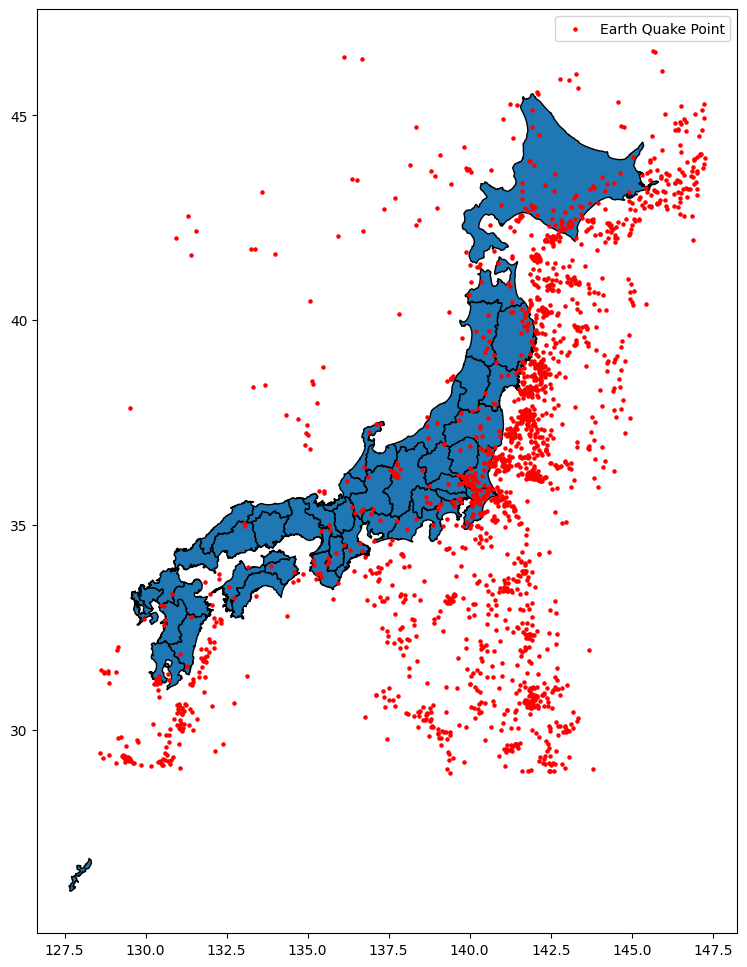

In [ ]:
ax = japan_regions_gdf.plot(figsize=(12, 12),edgecolor='k')
earth_quack_gdf.plot(ax=ax, color='red', marker='o', markersize=5, label='Earth Quake Point')
plt.legend()
plt.show()

In [ ]:
japan_regions_gdf['region_id'] = range(47)
# Perform a spatial join to count earth quake in each state
region_earth_quake_count = gpd.sjoin(japan_regions_gdf, earth_quack_gdf, how='inner', op='contains')

# Group by district and count the number of earth quake in each
earth_quake_counts = region_earth_quake_count.groupby('region_id').size().reset_index(name='num_earth_quakes')

# Merge the earth quake counts with the state data
region_data_with_earth_quake_counts = japan_regions_gdf.merge(earth_quake_counts, on='region_id', how='left')

# Fill missing values in 'num_earth_quake' with 0
region_data_with_earth_quake_counts['num_earth_quakes'] = region_data_with_earth_quake_counts['num_earth_quakes'].fillna(0).astype(int)

# Display the resulting DataFrame
print(region_data_with_earth_quake_counts[['region_id','name','geometry','num_earth_quakes' ]])

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


    region_id  name                                           geometry  \
0           0   三重県  MULTIPOLYGON (((136.51819 35.24997, 136.53030 ...   
1           1   京都府  MULTIPOLYGON (((134.87053 35.65896, 134.87114 ...   
2           2   佐賀県  MULTIPOLYGON (((130.27361 33.47655, 130.28325 ...   
3           3   兵庫県  MULTIPOLYGON (((134.87053 35.65896, 134.86992 ...   
4           4   北海道  MULTIPOLYGON (((141.42981 43.41342, 141.41289 ...   
5           5   千葉県  MULTIPOLYGON (((139.78915 36.10023, 139.80118 ...   
6           6  和歌山県  MULTIPOLYGON (((135.62474 34.38091, 135.63516 ...   
7           7   埼玉県  MULTIPOLYGON (((139.13032 36.27593, 139.15175 ...   
8           8   大分県  MULTIPOLYGON (((131.17545 33.58328, 131.18770 ...   
9           9   大阪府  MULTIPOLYGON (((135.71425 34.77803, 135.71179 ...   
10         10   奈良県  MULTIPOLYGON (((135.71425 34.77803, 135.73200 ...   
11         11   宮城県  MULTIPOLYGON (((141.48726 38.97499, 141.48965 ...   
12         12   宮崎県  MULTIPOLYGON (((1

Heatmap to display the Earth Quakes in Japan states


<ipython-input-28-3355f96eec2e>:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['num_earth_quakes']):


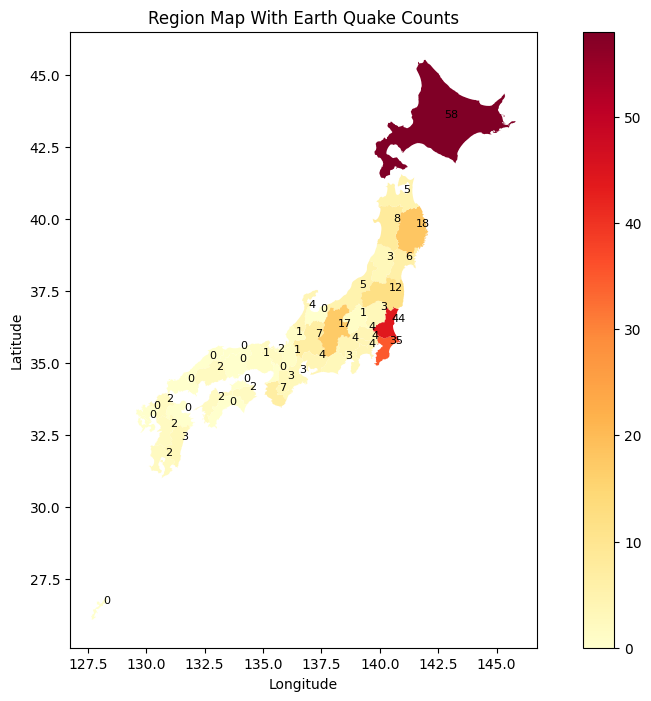

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a GeoDataFrame from the merged_earth_quake_counts DataFrame
gdf = gpd.GeoDataFrame(region_data_with_earth_quake_counts, geometry='geometry')

# Plot the region map with earth_quake counts
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='num_earth_quakes', cmap='YlOrRd', linewidth=0.8, ax=ax, legend=True)

# Annotate regions with earth_quake counts
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['num_earth_quakes']):
    ax.annotate(int(label), xy=(x, y), xytext=(3, 3), textcoords='offset points', fontsize=8)

# Set axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Region Map With Earth Quake Counts')

# Show the map
plt.show()

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

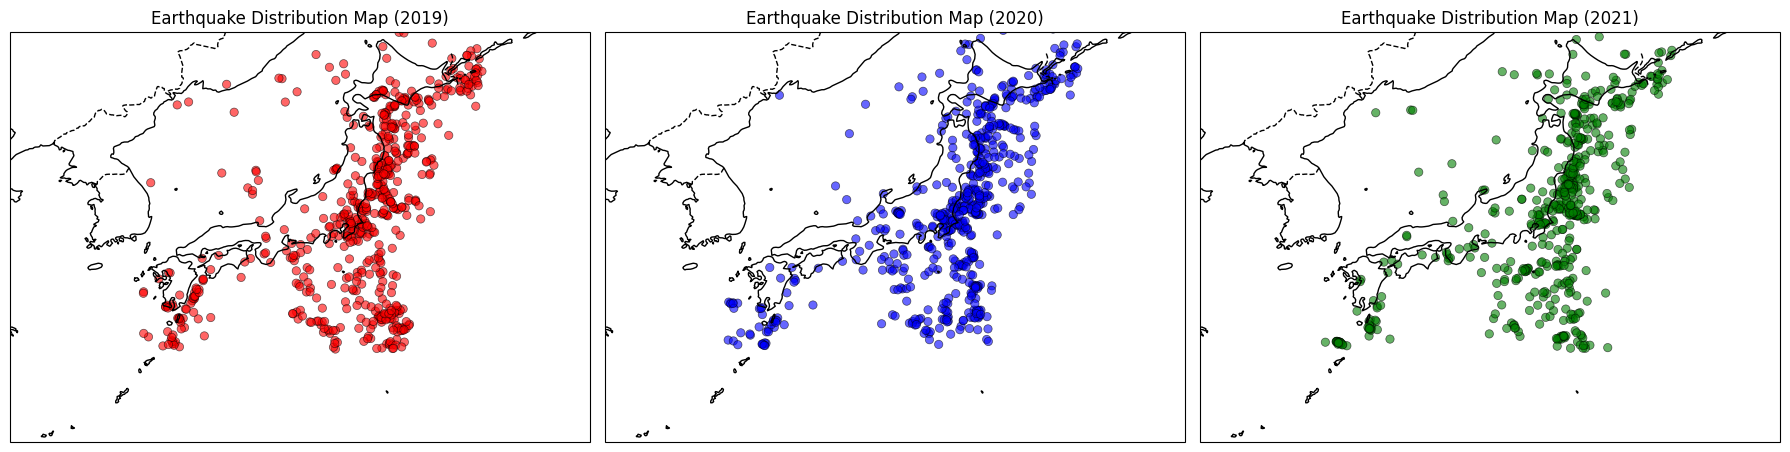

In [ ]:
!pip install cartopy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import pandas as pd
from datetime import datetime

geometry = [Point(lon, lat) for lon, lat in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(
    list(zip(df['time'], df['mag'], df['magType'],df['depth'], df['place'], df['type'], df['magError'], df['locationSource'], df['magSource'])),
    geometry=geometry,
    columns=["time", "mag", "magType","depth", "place", "type", "magError", "locationSource", "magSource"],
    crs="EPSG:4326"
)

# Convert the 'time' column to a datetime data type
gdf['time'] = pd.to_datetime(gdf['time'])

# Create a Matplotlib figure with subplots for each year
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Define year ranges
years = [2019, 2020, 2021]

# Define custom colors for each year
year_colors = {2019: 'red', 2020: 'blue', 2021: 'green'}

for i, year in enumerate(years):
    ax = axes[i]
    ax.set_extent([122, 153, 24, 45])

    # Filter earthquake data for the current year
    year_data = gdf[gdf['time'].dt.year == year]

    # Convert earthquake data to map coordinates
    x, y = list(year_data.geometry.x), list(year_data.geometry.y)

    # Calculate the time difference from the earliest date for the current year
    min_time = year_data['time'].min()
    year_data['time_numeric'] = (year_data['time'] - min_time).dt.total_seconds() / (60 * 60 * 24)  # Convert to days

    # Create a colormap for the current year based on custom colors
    cmap = mcolors.ListedColormap([year_colors[year]])

    # Scatter plot the earthquake data with color based on the custom colormap
    sc = ax.scatter(x, y, c=year_data['time_numeric'], cmap=cmap, alpha=0.6, edgecolors='k', linewidths=0.5)

    # Set map title
    ax.set_title(f'Earthquake Distribution Map ({year})')

    # Draw coastlines and borders
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle='--')

plt.tight_layout()

# Show the map
plt.show()


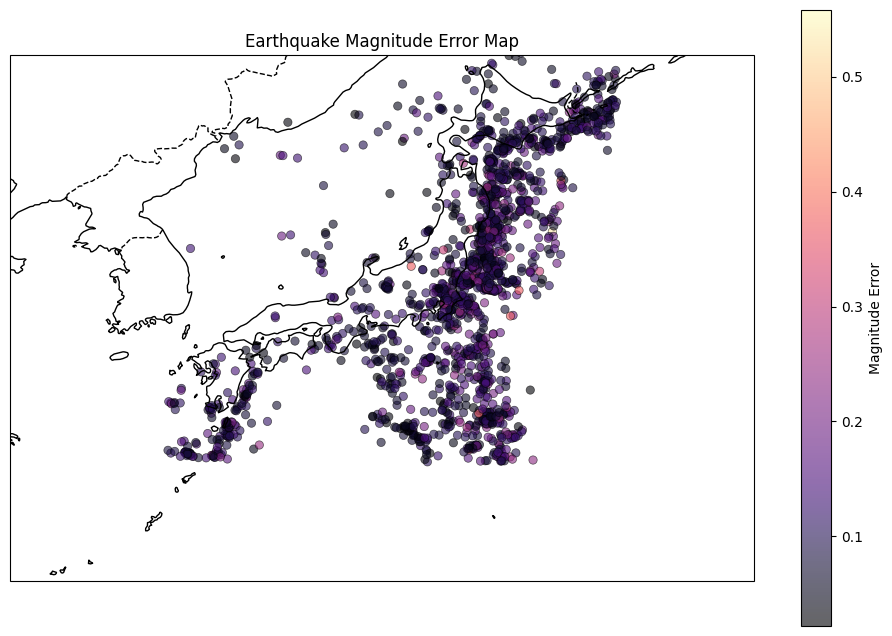

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

# Assuming you have a GeoDataFrame 'gdf' with the 'magError' column
# You can customize the colormap to suit your preferences

# Create a Matplotlib figure
plt.figure(figsize=(12, 8))

# Create a Cartopy map centered around Japan
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([122, 153, 24, 45])

# Convert earthquake data to map coordinates
x, y = list(gdf.geometry.x), list(gdf.geometry.y)

# Define a colormap based on 'magError'
cmap = plt.get_cmap('magma')  # You can choose a different colormap

# Set the 'magError' as the data for color coding
mag_error_values = gdf['magError']

# Define color normalization based on 'magError' values
norm = mcolors.Normalize(vmin=mag_error_values.min(), vmax=mag_error_values.max())

# Scatter plot the earthquake data with color based on 'magError'
sc = ax.scatter(x, y, c=mag_error_values, cmap=cmap, norm=norm, alpha=0.6, edgecolors='k', linewidths=0.5)

# Add a colorbar with 'magError' labels
cbar = plt.colorbar(sc, label='Magnitude Error')
cbar.set_label('Magnitude Error')

# Set map title
plt.title('Earthquake Magnitude Error Map')

# Draw coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle='--')

# Show the map
plt.show()
